In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [2]:
x, y = make_blobs(n_samples=500, n_features=2, centers=4, random_state=1)

In [3]:
x.shape

(500, 2)

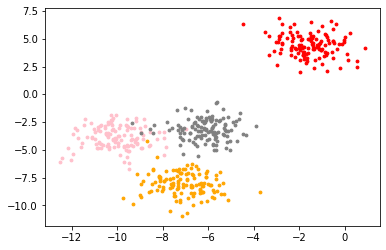

In [4]:
color = ["red","pink","orange","gray"]
fig, ax1 = plt.subplots(1)
for i in range(4):
    ax1.scatter(x[y==i, 0], x[y==i, 1]
                ,marker='o' #点的形状
                ,s=8 #点的大小
                ,c=color[i]
                )
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [6]:
n_clusters = 3
cluster = KMeans(n_clusters=n_clusters, random_state=0).fit(x)

In [7]:
y_pred = cluster.labels_
y_pred

array([2, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0,
       0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0,
       2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 0, 0,

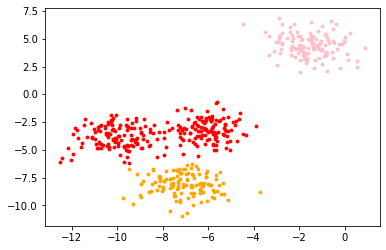

In [8]:
color = ["red","pink","orange"]
fig, ax1 = plt.subplots(1)
for i in range(3):
    ax1.scatter(x[y_pred==i, 0], x[y_pred==i, 1]
                ,marker='o' #点的形状
                ,s=8 #点的大小
                ,c=color[i]
                )
plt.show()

In [9]:
centroid = cluster.cluster_centers_
centroid

array([[-8.09286791, -3.50997357],
       [-1.54234022,  4.43517599],
       [-7.0877462 , -8.08923534]])

In [10]:
inertia = cluster.inertia_
inertia

1903.5342237665059

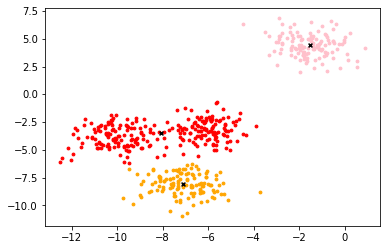

In [11]:
color = ["red","pink","orange"]
fig, ax1 = plt.subplots(1)
for i in range(3):
    ax1.scatter(x[y_pred==i, 0], x[y_pred==i, 1]
                ,marker='o' #点的形状
                ,s=8 #点的大小
                ,c=color[i]
                )
ax1.scatter(centroid[:,0],centroid[:,1]
            ,marker="x"
            ,s=15
            ,c="black")
plt.show()

In [17]:
def plot_result(n, x, y_pred, centroid):
    color = ["red","pink","orange", "gray", "blue", "green"]
    fig, ax1 = plt.subplots(1)
    for i in range(n):
        ax1.scatter(x[y_pred==i, 0], x[y_pred==i, 1]
                    ,marker='o' #点的形状
                    ,s=8 #点的大小
                    ,c=color[i]
                    )
    ax1.scatter(centroid[:,0],centroid[:,1]
                ,marker="x"
                ,s=15
                ,c="black")
    plt.show()

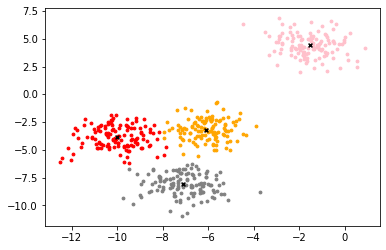

In [26]:
n_clusters = 4
cluster = KMeans(n_clusters=n_clusters, random_state=0).fit(x)
y_pred = cluster.labels_
centroid = cluster.cluster_centers_
plot_result(n_clusters, x, y_pred, centroid)

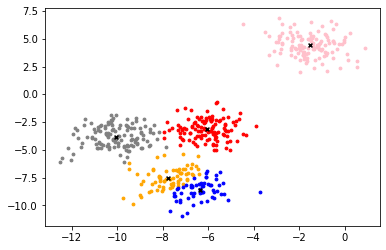

In [19]:
n_clusters = 5
cluster = KMeans(n_clusters=n_clusters, random_state=0).fit(x)
y_pred = cluster.labels_
centroid = cluster.cluster_centers_
plot_result(n_clusters, x, y_pred, centroid)

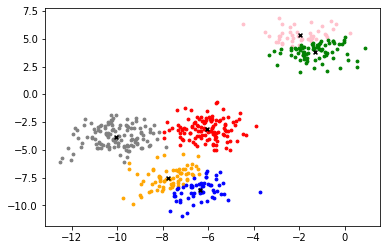

In [20]:
n_clusters = 6
cluster = KMeans(n_clusters=n_clusters, random_state=0).fit(x)
y_pred = cluster.labels_
centroid = cluster.cluster_centers_
plot_result(n_clusters, x, y_pred, centroid)

# 聚类评估指标

## 真实标签已知
可以采用互信息分，V-meansure，兰德系数进行评价
## 真实标签未知
### 轮廓系数（评价簇内差异与簇外差异的关系）
取值在-1到1之间，越接近1表示簇内越相似

In [21]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [27]:
silhouette_score(x,y_pred)# 分四簇时的结果

0.6505186632729437

In [28]:
silhouette_samples(x,y_pred)

array([ 0.62903385,  0.43289576,  0.55834047,  0.82660742,  0.35213124,
        0.74123252,  0.68902347,  0.58705868,  0.04062548,  0.73241492,
        0.59363669,  0.75135825,  0.66326503,  0.81480193,  0.45066007,
        0.59477448,  0.10348453,  0.66633309,  0.84176332,  0.6089521 ,
        0.70366952,  0.66565716,  0.59626118,  0.78488729,  0.64257685,
        0.53469157,  0.86623858,  0.80913231,  0.62625573,  0.70079616,
        0.62490578,  0.83417556,  0.74035924,  0.54405603,  0.71658615,
        0.6694404 ,  0.69313134,  0.60546734,  0.58315885,  0.59179481,
        0.64472091,  0.56153618,  0.73581549,  0.50944136,  0.66243564,
        0.73163465,  0.57031198,  0.68128648,  0.85802959,  0.76946886,
        0.81915048,  0.68541025,  0.5406262 ,  0.72334031,  0.63576372,
        0.69892782,  0.64245745,  0.40251287,  0.57213237,  0.46118988,
        0.83726051,  0.80179027,  0.45393636,  0.54665199,  0.85023055,
        0.6688164 ,  0.69778864,  0.69091353,  0.68586222,  0.46

### 卡林斯基-哈拉巴斯指数（CHI）
越高越好

In [32]:
import sklearn
print("Sklearn verion is {}".format(sklearn.__version__))

Sklearn verion is 0.23.1


In [33]:
from sklearn.metrics import calinski_harabasz_score

In [34]:
calinski_harabasz_score(x, y_pred)

2704.4858735121097

In [35]:
# 查看那CHI计算的时间
from time import time
t0 = time()
calinski_harabasz_score(x, y_pred)
time() - t0

0.0010919570922851562

In [36]:
import datetime
datetime.datetime.fromtimestamp(t0).strftime("%Y-%m-%d %H:%M:%S")

'2020-07-28 14:34:13'